In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
indicators=pd.read_csv("RHoMISmother_indicators.csv")
codebook=pd.read_csv("raw data code book.csv")

In [3]:
raw=pd.read_csv("RHoMISmother_rawdata.csv",encoding = "ISO-8859-1")

C:\Users\Clare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8,29,46,48,49,58,65,70,77,80,84,97,119,121,122,123,124,125,126,127,129,133,134,136,137,139,141,142,145,146,147,149,150,153,155,158,164,166,171,173,249,270,285,294,301,316,319,330,334,337,348,355,366,370,373,377,378,379,381,382,383,384,385,386,387,388,390,392,393,394,395,396,397,399,400,401,402,403,404,405,406,408,410,411,412,413,414,415,417,418,419,420,421,422,423,424,426,428,429,430,443,444,456,462,469,475,499,500,514,515,517,519,525,531,535,536,538,539,541,542,555,556,561,565,569,570,571,573,575,576,581,587,591,592,594,595,597,598,611,612,614,615,617,619,621,625,626,627,629,631,632,637,639,640,642,644,645,647,648,650,651,653,654,655,656,658,660,664,665,667,668,669,670,671,674,675,689,691,693,694,703,704,706,707,709,710,719,723,724,726,727,728,729,730,735) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

In [4]:
indicators[indicators['HHsizemembers']==417]['total_income']
# one household is recorded as having 417 members

224    1370.625
Name: total_income, dtype: float64

In [5]:
indicators['Country'].unique()

array(['Kenya', 'Ethiopia', 'Tanzania', 'Zambia', 'Mali', 'Cambodia',
       'Vietnam', 'DRC', 'Burkina Faso', 'LaoPDR', 'India_Bihar_Vaishali'], dtype=object)

In [6]:
# create a numerical column for HFIAS status
prob=0
for i in range(len(indicators)):
    if str(indicators.loc[i,'HFIAS_status'])=='FoodSecure':
        indicators.loc[i,'HFIAS_code']=0
    elif str(indicators.loc[i,'HFIAS_status'])=='MildlyFI':
        indicators.loc[i,'HFIAS_code']=1
    elif str(indicators.loc[i,'HFIAS_status'])=='ModeratelyFI':
        indicators.loc[i,'HFIAS_code']=2
    elif str(indicators.loc[i,'HFIAS_status'])=='SeverelyFI':
        indicators.loc[i,'HFIAS_code']=3
        continue
    else:
        prob+=1
print('There were problems in ',prob,' rows. Probably NaN.')

There were problems in  249  rows. Probably NaN.


In [7]:
# new column for household income per adult male equivalent
for i in range(len(indicators)):
    if indicators.loc[(i,'HHsizeMAE')]!=0:
        indicators.loc[(i,'income_percap')]=np.divide(indicators.loc[(i,'total_income')],indicators.loc[(i,'HHsizeMAE')])
    else: 
        indicators.loc[(i,'income_percap')]=np.divide(indicators.loc[(i,'total_income')],indicators.loc[(i,'HHsizemembers')])

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [8]:
indicators.groupby('income_percap').count()
# there are 34 households with no male adult equivalent people
# now only the 14 households with no members have infinite income per capita

,HHid,Country,Region,Village,Latitude,Longitude,HHsizemembers,HHsizeMAE,HouseholdType,Head_EducationLevel,...,FALivestockOrientation,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,Gender_MaleYouthControl,Gender_FemaleYouthControl,NFertInput,CropDiv,LivestockDiv,HFIAS_code
income_percap,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,483,483,419,478,462,462,483,483,481,476,...,424,470,483,483,383,383,481,481,483,479
7.919328e-03,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1.033699e-02,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
2.303642e-02,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.576343e-02,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6.339026e-02,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7.630814e-02,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,1
8.984726e-02,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
1.022727e-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
indicators_success=indicators[['NrofMonthsFoodInsecure','score_PPI','HFIAS_code','score_HDDSBadSeason', 'score_HDDSGoodSeason','income_percap']]

In [10]:
indicators_success.describe()

,NrofMonthsFoodInsecure,score_PPI,HFIAS_code,score_HDDSBadSeason,score_HDDSGoodSeason,income_percap
count,3764.000000,4479.000000,4751.000000,4164.000000,4989.000000,4998.000000
mean,2.244155,44.021433,1.765313,4.205572,5.981760,inf
std,2.040815,18.357791,1.228720,2.578391,2.297681,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,0.000000,2.000000,4.000000,16.962646
50%,2.000000,43.000000,2.000000,4.000000,6.000000,94.638699
75%,3.000000,56.000000,3.000000,6.000000,8.000000,356.248793
max,12.000000,100.000000,3.000000,10.000000,10.000000,inf


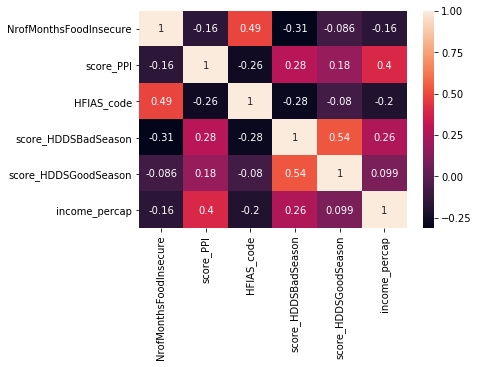

In [11]:
a=sns.heatmap(indicators_success.corr(method='spearman'),annot=True)
# HDDS score in good season looks like less good indicator than in bad season, but closely related. Dropped.
# HFIAS code seems to have considerable overlap with number of months food insecure - perhaps calculated using this.
# HFIAS code seems to correlate better with the other measures - perhaps more overlap.
#a.savefig('heatmap success indicators assoc')

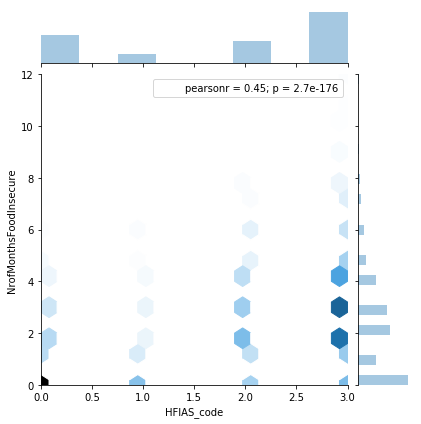

In [12]:
sns.jointplot(data=indicators_success,y='NrofMonthsFoodInsecure',x='HFIAS_code',kind='hex')

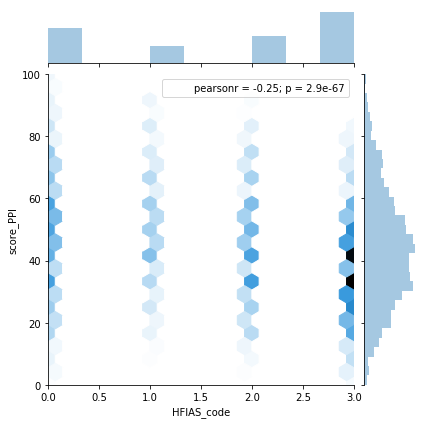

In [13]:
sns.jointplot(data=indicators_success,y='score_PPI',x='HFIAS_code',kind='hex')
# people who are more likely to be in poverty appear more likely to have food shortages

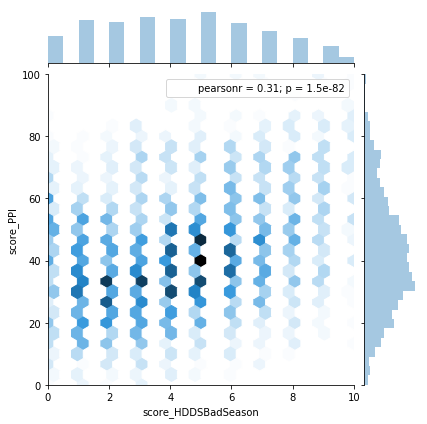

In [14]:
a= sns.jointplot(data=indicators_success,y='score_PPI',x='score_HDDSBadSeason',kind='hex')
# people less likely to be in poverty are more likely to eat a wider range of food in bad season
a.fig.savefig('HDDS and PPI')

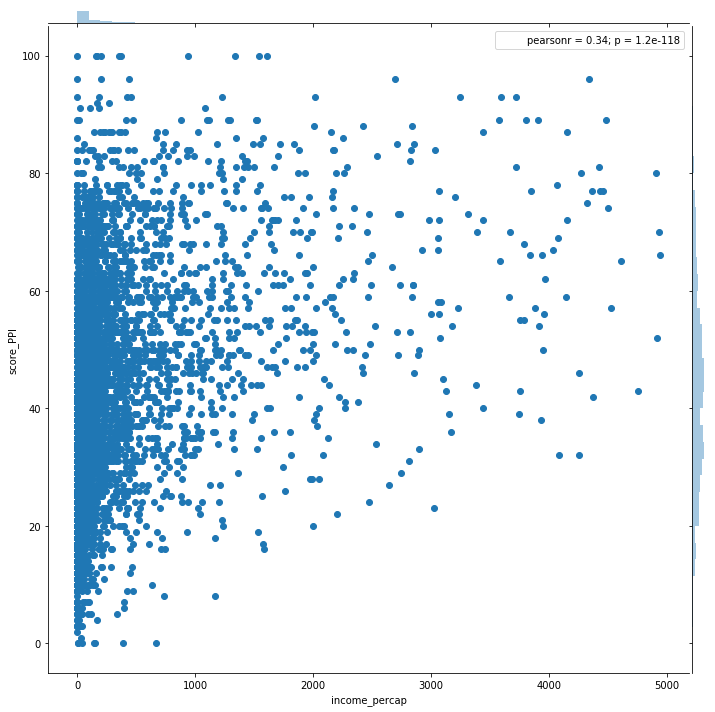

In [15]:
sns.jointplot(data=indicators_success[indicators_success['income_percap']<5e3],x='income_percap',y='score_PPI',size=10,ratio=40)
# income per capita has much higher Pearson with outliers removed; obviously. Most are clustered around 0 income
# very high SRCC shows this is relevant

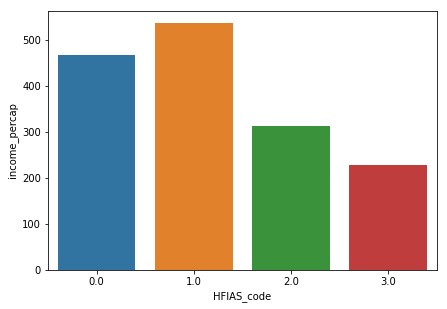

In [27]:
b=plt.figure()
a=b.add_axes([0.1,0.15,.9,.9])
sns.barplot(data=indicators_success[indicators_success['income_percap']<5e3],x='HFIAS_code',y='income_percap', ci=False, ax=a)
# maybe check this by region
b.savefig('HFIAS code and income')

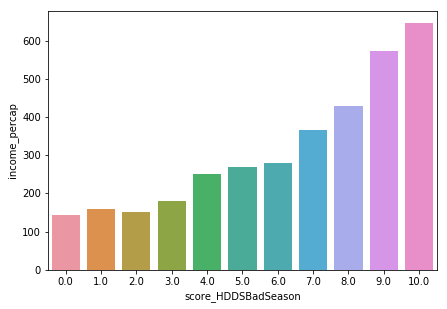

In [36]:
b=plt.figure()
a=b.add_axes([0.1,0.15,.9,.9])
sns.barplot(data=indicators_success[indicators_success['income_percap']<5e3],x='score_HDDSBadSeason',y='income_percap', ci=False, ax=a)
# maybe check this by region
b.savefig('HDDS score and income')

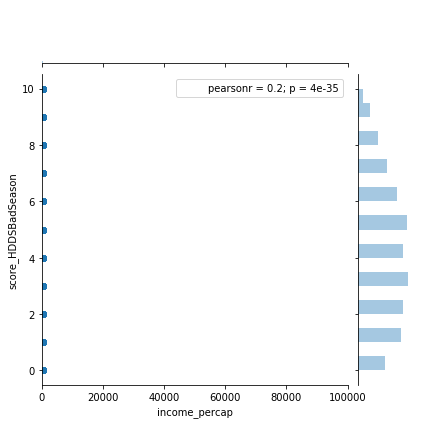

In [18]:

sns.jointplot(data=indicators_success[indicators_success['income_percap']<5e2],y='score_HDDSBadSeason',x='income_percap',kind='scatter',xlim=(0,1e5))
# maybe check this by region


In [19]:
# doesn't work
# a=sns.FacetGrid(data=indicators[indicators['income_percap']<5e3],row='Country', size=6)
# a.map(sns.jointplot,x='score_PPI',y='income_percap',kind='scatter')

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


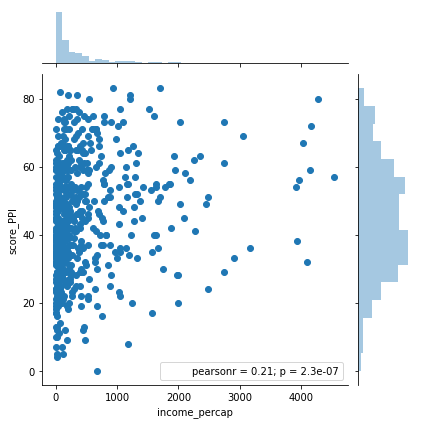

In [20]:
sns.jointplot(data=indicators[indicators['income_percap']<5e3][indicators['Country']=='Kenya'],x='income_percap',y='score_PPI',kind='scatter')
# still doesn't seem to show a relationship

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


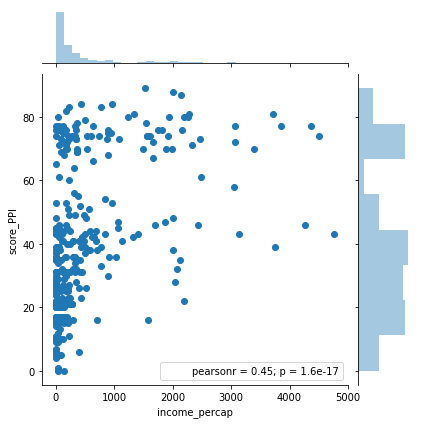

In [21]:
#'Kenya', 'Ethiopia', 'Tanzania', 'Zambia', 'Mali', 'Cambodia',
#       'Vietnam', 'DRC', 'Burkina Faso', 'LaoPDR', 'India_Bihar_Vaishali'
sns.jointplot(data=indicators[indicators['income_percap']<5e3][indicators['Country']=='Ethiopia'],x='income_percap',y='score_PPI',kind='scatter')

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


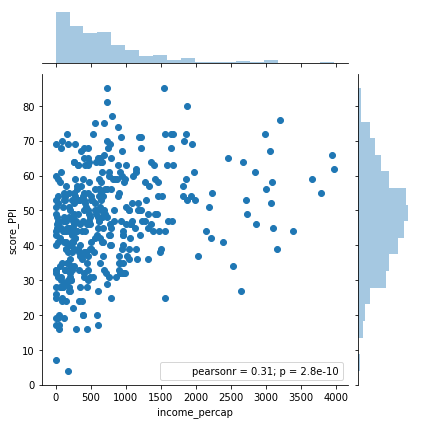

In [22]:
#'Kenya', 'Ethiopia', 'Tanzania', 'Zambia', 'Mali', 'Cambodia',
#       'Vietnam', 'DRC', 'Burkina Faso', 'LaoPDR', 'India_Bihar_Vaishali'
sns.jointplot(data=indicators[indicators['income_percap']<5e3][indicators['Country']=='Cambodia'],x='income_percap',y='score_PPI',kind='scatter')

In [31]:
len(indicators[indicators['income_percap']<5000])

4899

In [33]:
np.divide(99,4899+99)

0.019807923169267706